In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [117]:
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<h1 style = "color: white;">  Data Process Analysis </h1>

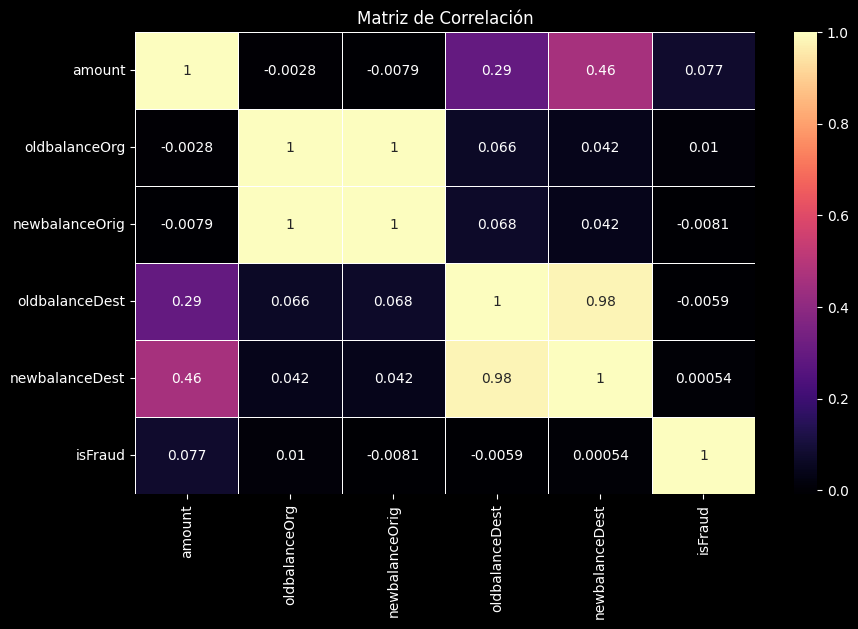

In [124]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols + ["isFraud"]].corr(), annot=True, cmap="magma", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

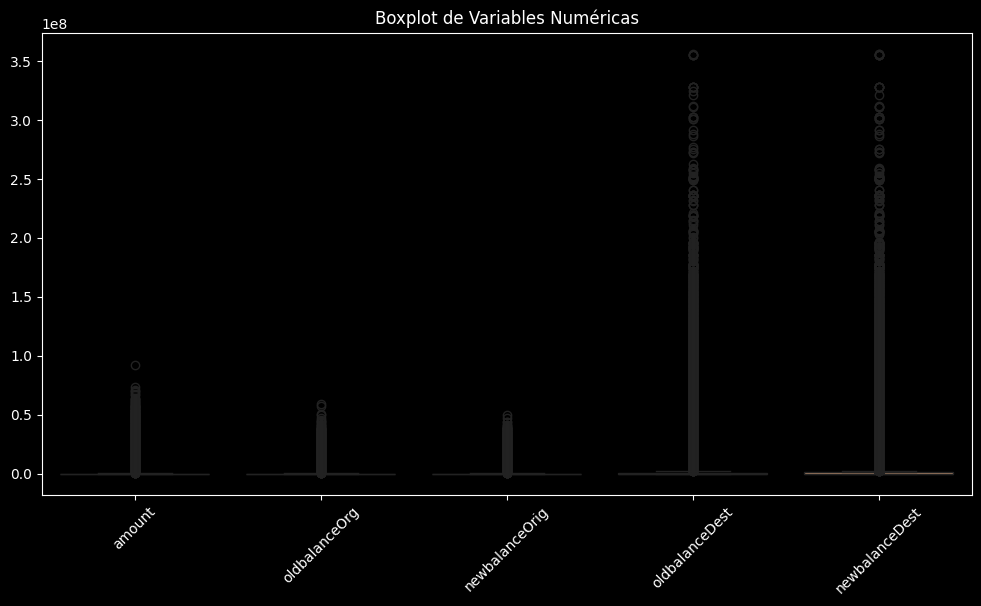

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols], palette="magma")
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Numéricas")
plt.show()

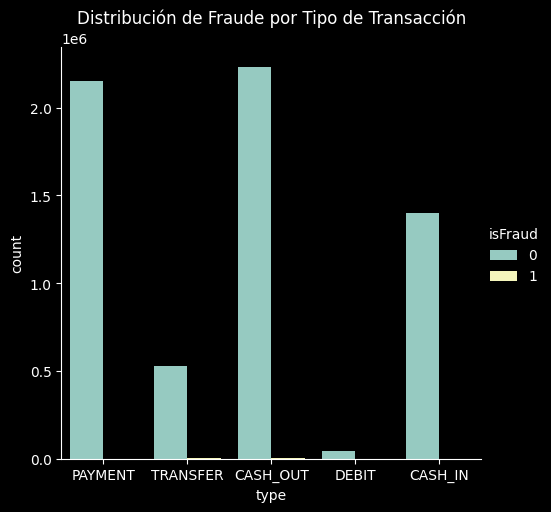

In [130]:
sns.catplot(x="type", hue="isFraud", data=data, kind="count")
plt.title("Distribución de Fraude por Tipo de Transacción")
plt.show()

In [ ]:

data = pd.get_dummies(data, columns=['type'], drop_first=True) 

In [53]:
data.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [54]:
data[["type_CASH_OUT", "type_DEBIT", "type_PAYMENT", "type_TRANSFER"]] = data[
    ["type_CASH_OUT", "type_DEBIT", "type_PAYMENT", "type_TRANSFER"]
].astype(int)
data.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [55]:
X = data.drop(["isFraud", "isFlaggedFraud", "nameOrig"], axis = 1)
Y = data["isFraud"]

<h1 style = "color: white;">  Stochastic Gradient Descent (SGD) Classifier </h1>

In [ ]:
print(X_train.dtypes)
print(X_train.select_dtypes(include=['object']).head())

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object
            nameDest
6271196  C1977099364
1888243  C1690589535
5549957  M1695416333
2025342   C577654587
682342   C2143015292


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [60]:
X_train = X_train.drop(columns=["nameDest"])
X_test = X_test.drop(columns=["nameDest"])


In [61]:
SDG_M = SGDClassifier(loss = 'log_loss', random_state = 42)    
SDG_M.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [64]:
y_pred = SDG_M.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1272524,))

Matriz de Confusión:


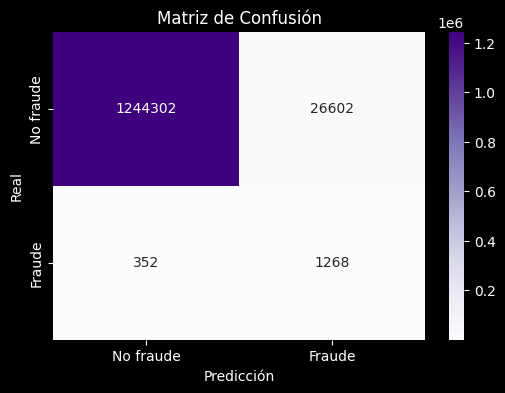

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270904
           1       0.05      0.78      0.09      1620

    accuracy                           0.98   1272524
   macro avg       0.52      0.88      0.54   1272524
weighted avg       1.00      0.98      0.99   1272524



In [67]:
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
plt.style.use("dark_background")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["No fraude", "Fraude"], yticklabels=["No fraude", "Fraude"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

<h1 style="color: white;">EK Nearest Neighbors </h1>

In [ ]:
data = data.drop(columns=['nameDest', 'nameOrig'])

In [92]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [98]:
X2 = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)  
y2 = data['isFraud'] 

In [99]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [94]:
y_train_large = (y2_train >= 7)

y_train_odd = (y2_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [100]:
y_multilabel[100]

array([False, False])

In [101]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X2_train, y_multilabel)

KNeighborsClassifier()

In [102]:
y2_pred = knn_clf.predict(X2_test)

In [113]:
if len(y2_test.shape) > 1:
    y2_test = np.argmax(y2_test, axis=1)
if len(y2_pred.shape) > 1:
    y2_pred = np.argmax(y2_pred, axis=1)

Matriz de Confusión:


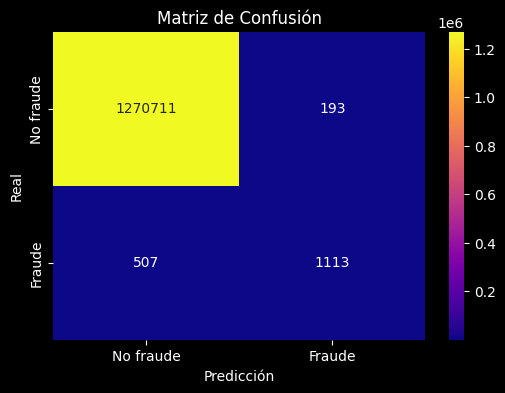

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.85      0.69      0.76      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

Precisión: 0.9994499121431109


In [116]:
# Matriz de confusión
cm2 = confusion_matrix(y2_test, y2_pred)
print("Matriz de Confusión:")
plt.style.use("dark_background")
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="plasma", xticklabels=["No fraude", "Fraude"], yticklabels=["No fraude", "Fraude"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


# Informe de clasificación
report = classification_report(y2_test, y2_pred)
print("Informe de Clasificación:")
print(report)



from sklearn.metrics import accuracy_score
# Precisión
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Precisión:", accuracy2)